In [1]:
require("/home/amit/Downloads/SemVII/QuDynamics.jl/src/QuDynamics.jl")

 in depwarn at deprecated.jl:73
 [inlined code] from deprecated.jl:694
 in require at no file:0
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/amit/.julia/v0.4/IJulia/src/execute_request.jl:182
 in eventloop at /home/amit/.julia/v0.4/IJulia/src/IJulia.jl:142
 in anonymous at task.jl:447
while loading In[1], in expression starting on line 1


In [2]:
using PyPlot

In [3]:
using QuDynamics
using QuBase

In [4]:
immutable QuSchrodingerEqTD <: QuEquation{0}
end

In [5]:
function fn(H1, H2, t)
    H1 + 9*H2*expm(-(t/5)^2)
end

fn (generic function with 1 method)

In [6]:
N = 2 # Set where to truncate Fock state for cavity
ustate = statevec(1, FiniteBasis(3))
excited = statevec(2, FiniteBasis(3))
ground = statevec(3, FiniteBasis(3))
sigma_ge = tensor(QuArray(eye(N)), ground * excited')  # |g><e|
sigma_ue = tensor(QuArray(eye(N)), ustate * excited')  # |u><e|
a = tensor(lowerop(N), QuArray(eye(3)))
g = 5
H0 = -g * (sigma_ge' * a + a' * sigma_ge)  # time-independent term
H1 = sigma_ue' + sigma_ue

6x6 QuMatrix in QuBase.FiniteBasis{QuBase.Orthonormal}:
...coefficients: Array{Float64,2}
[0.0 1.0 0.0 0.0 0.0 0.0
 1.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 1.0 0.0
 0.0 0.0 0.0 1.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0]

In [7]:
function QuDynamics.operator(qu_eq::QuSchrodingerEqTD, t)
    QuDynamics.liouvillian_op(fn(H0, H1, t))
end

operator (generic function with 9 methods)

In [8]:
psi0 = tensor(statevec(1, FiniteBasis(N)), ustate)

6-element QuVector in QuBase.FiniteBasis{QuBase.Orthonormal}:
...coefficients: Array{Float64,1}
[1.0,0.0,0.0,0.0,0.0,0.0]

In [9]:
tlist = linspace(-15,15,100)

linspace(-15.0,15.0,100)

In [10]:
quprop = QuPropagator(QuSchrodingerEqTD(), psi0*psi0', tlist, QuExpmV())

QuDynamics.QuStateEvolution{QuDynamics.QuExpmV,QuBase.QuArray{QuBase.FiniteBasis{QuBase.Orthonormal},Float64,2,Array{Float64,2}},QuSchrodingerEqTD}(QuSchrodingerEqTD(),6x6 QuMatrix in QuBase.FiniteBasis{QuBase.Orthonormal}:
...coefficients: Array{Float64,2}
[1.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0],linspace(-15.0,15.0,100),QuDynamics.QuExpmV(Dict{Symbol,Any}()))

In [11]:
for (t, rho) in quprop
    println(t, rho)
end

-14.6969696969696976x6 QuMatrix in QuBase.FiniteBasis{QuBase.Orthonormal}:
...coefficients: Array{Complex{Float64},2}
Complex{Float64}[0.9999998085378201 + 0.0im 0.0 + 0.00031789189674585715im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0003006773774052705 + 0.0im
                 0.0 - 0.0003178918967458572im 1.010552773632061e-7 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 - 9.558292011221658e-8im
                 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im
                 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im
                 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im
                 0.0003006773774052705 + 0.0im 0.0 + 9.558292011221658e-8im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 9.040690259455041e-8 + 0.0im]
-14.3939393939393946x6 QuMatrix in QuBase.FiniteBasis{QuBase.Orthonormal}:
...coefficients: Array{Complex{Float64},2}
Complex{Float64}[0.9999993906563734 + 0.0im 0.0 + 0.00016976000105131043i

In [12]:
q = Array[]
push!(q, coeffs(vec(psi0*psi0')))
for (t, psi) in quprop
    push!(q, coeffs(vec(psi)))
end
q

100-element Array{Array{T,N},1}:
 [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]                                                                                                                                                                                                  
 Complex{Float64}[1.0+0.0im,0.0-0.000317892im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.000300677+0.0im,0.0+0.000317892im,1.01055e-7+0.0im,0.0+0.0im,0.0+0.0im  …  0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.000300677+0.0im,0.0-9.55829e-8im,0.0+0.0im,0.0+0.0im,0.0+0.0im,9.04069e-8+0.0im]     
 Complex{Float64}[0.999999+0.0im,0.0-0.00016976im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.000761922+0.0im,0.0+0.00016976im,2.88185e-8+0.0im,0.0+0.0im,0.0+0.0im  …  0.0+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.000761922+0.0im,0.0-1.29344e-7im,0.0+0.0im,0.0+0.0im,0.0+0.0im,5.80525e-7+0.0im]  
 Complex{Float64}[0.999999+0.0im,0.0+0.000112496im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.000816084+0.0im,0.0-0.000112496im,1.26554

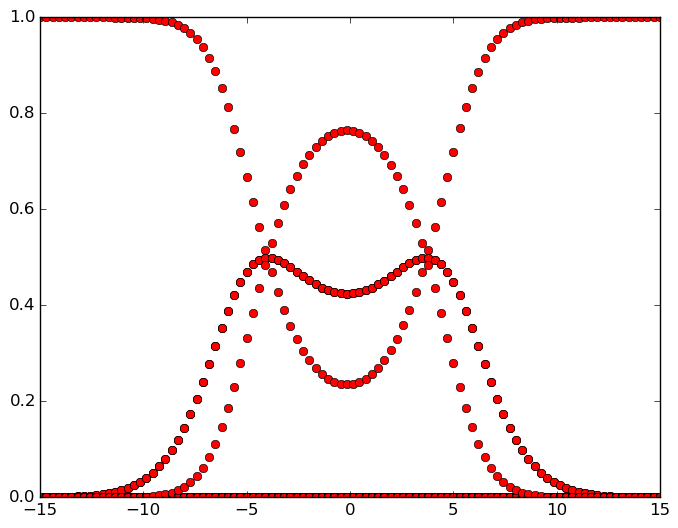

In [13]:
for i in 1:length(q)
    for j in 1:length(q[i])
    plot(tlist[i], real(q[i][j]), "ro")
    # println(tlist[i], real(q[i]))
    end
end

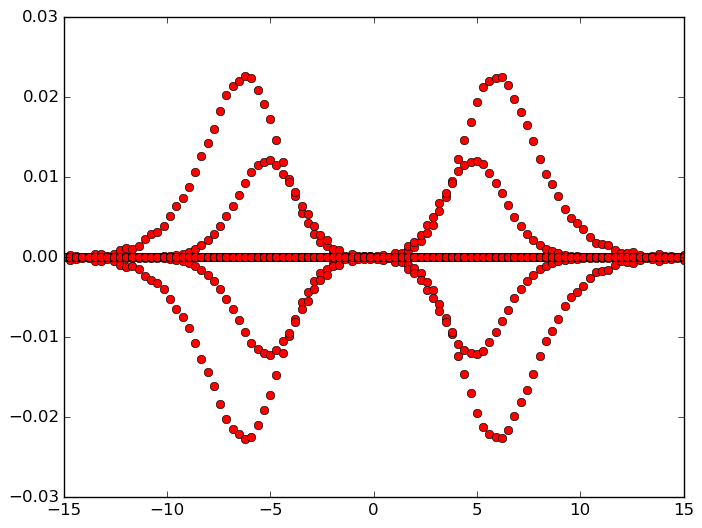

In [14]:
for i in 1:length(q)
    for j in 1:length(q[i])
        plot(tlist[i], imag(q[i][j]), "ro")
    # println(tlist[i], real(q[i]))
    end
end